In [140]:
import kaggle
import zipfile

#libraries for data and visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import norm

import warnings
warnings.simplefilter("ignore")

In [141]:
!kaggle datasets download -d aungpyaeap/supermarket-sales

supermarket-sales.zip: Skipping, found more recently modified local copy (use --force to force download)


In [142]:
zip_name = 'supermarket-sales.zip'
with zipfile.ZipFile(zip_name, 'r') as file:
    file.extractall()

In [143]:
ds_sales = pd.read_csv('supermarket_sales - Sheet1.csv')

In [144]:
ds_sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [145]:
ds_sales.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [146]:
ds_sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [147]:
ds_sales.shape

(1000, 17)

In [148]:
ds_sales.isnull().sum()
#Seems like there aren't any null values

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [149]:
ds_sales['Product line'].value_counts(), ds_sales['City'].value_counts()
#Listing out all the diferent variables in each column along with their count

(Fashion accessories       178
 Food and beverages        174
 Electronic accessories    170
 Sports and travel         166
 Home and lifestyle        160
 Health and beauty         152
 Name: Product line, dtype: int64,
 Yangon       340
 Mandalay     332
 Naypyitaw    328
 Name: City, dtype: int64)

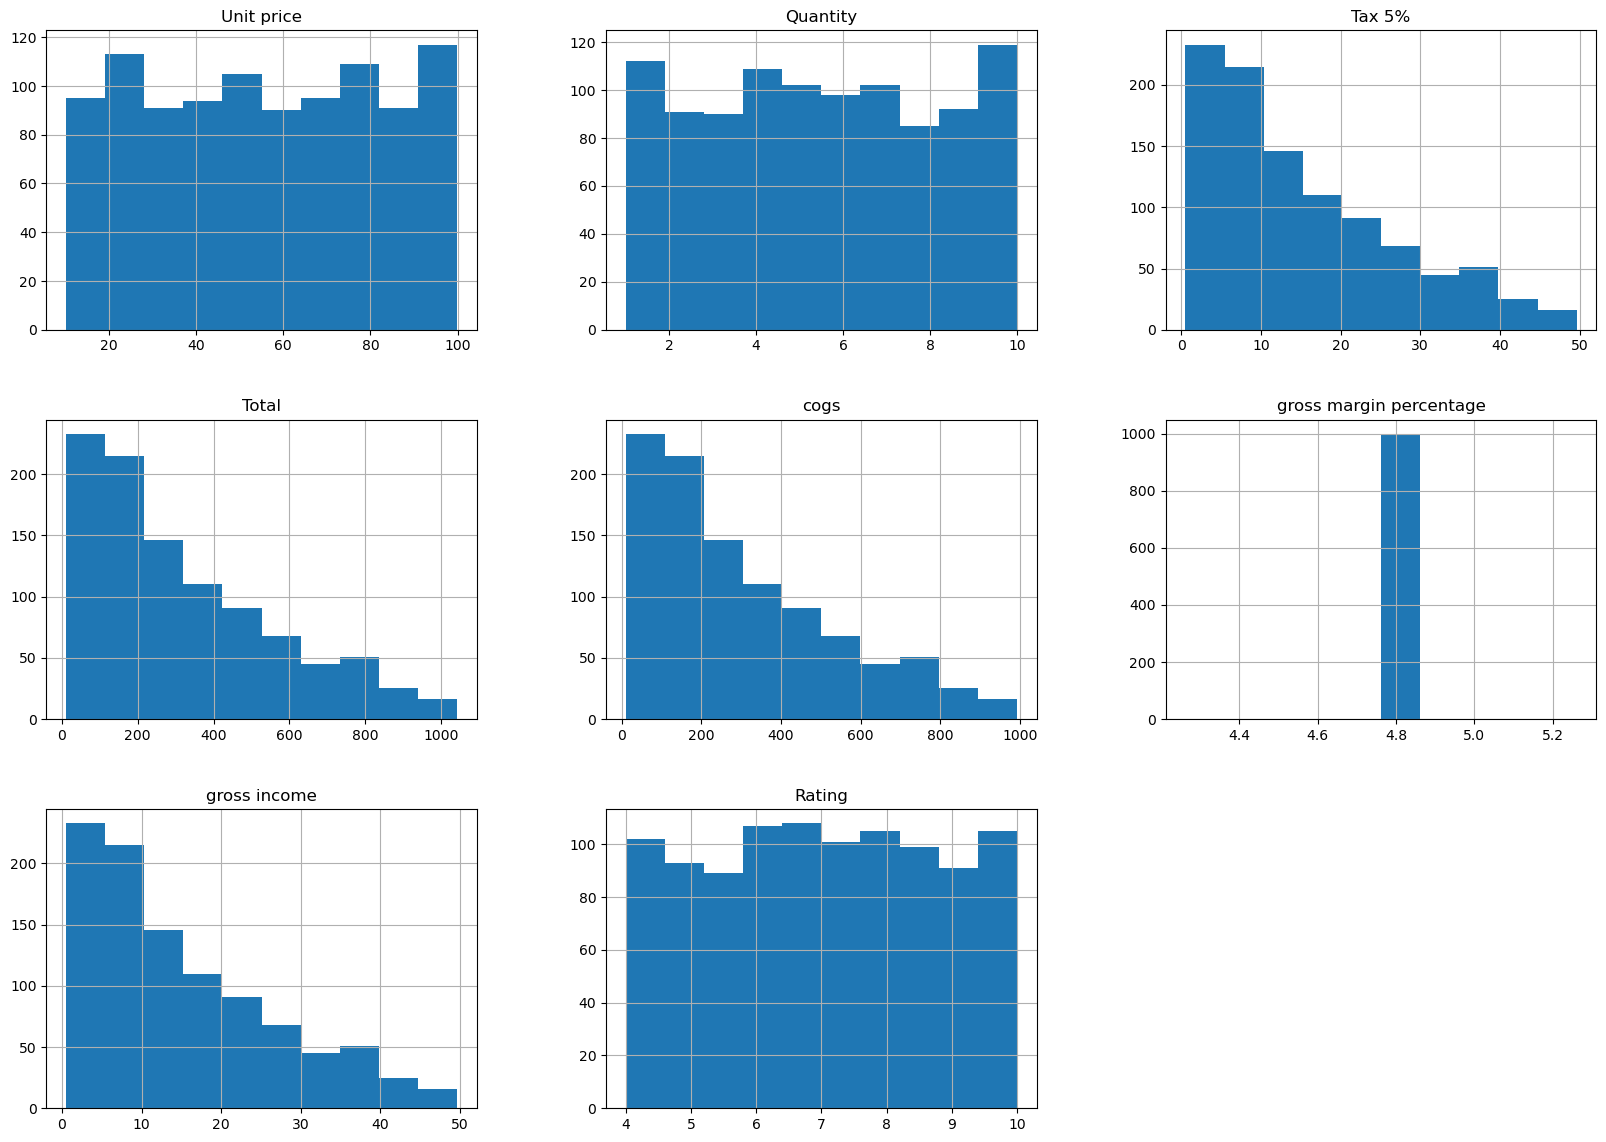

In [150]:
ds_sales.hist(figsize=(20,14))
plt.show()

<AxesSubplot:>

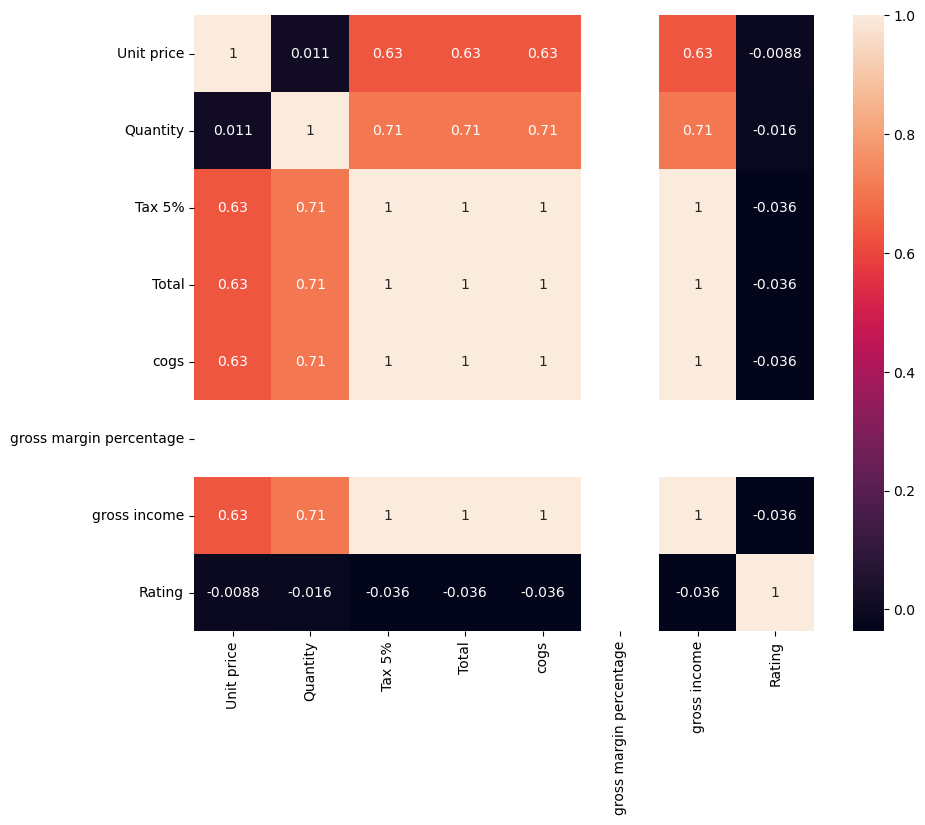

In [151]:
plt.figure(figsize = (10,8))

sns.heatmap(ds_sales.corr(), annot =True)

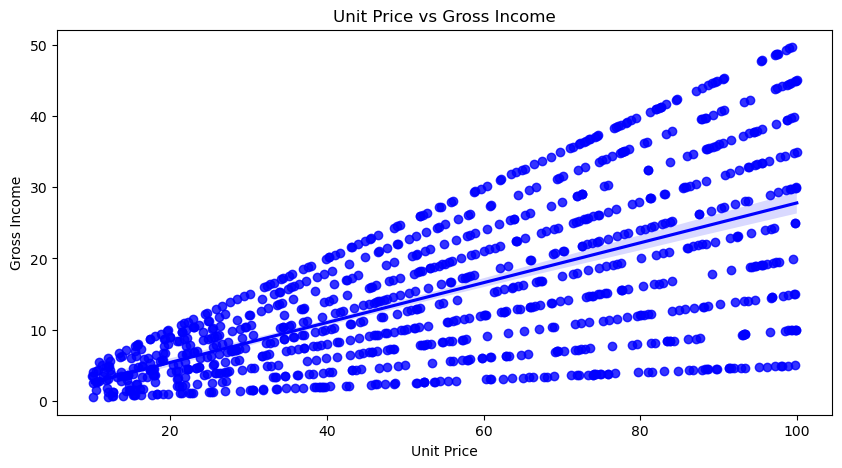

In [152]:
#Showing the relationship between price of each product against gross income
plt.figure(figsize=(10,5))
sns.regplot(x='Unit price',y='gross income',data=ds_sales,color='b')
plt.xlabel('Unit Price')
plt.ylabel('Gross Income')
plt.title('Unit Price vs Gross Income',fontsize=12)
plt.show()

Number of transactions in Branch A:  340
Number of transactions in Branch B:  332
Number of transactions in Branch C:  328


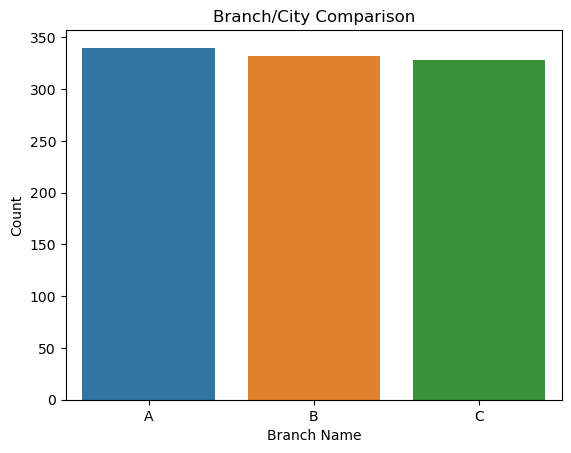

In [153]:
#Branch/City Count
sorted_counts = ds_sales['Branch'].value_counts().sort_values(ascending=False)
sorted_categories = sorted_counts.index.tolist()
#This helps order it in descending order

sns.countplot(x='Branch', data=ds_sales, order=sorted_categories)
plt.xlabel('Branch Name')
plt.ylabel('Count')
plt.title('Branch/City Comparison')

A, B, C = ds_sales['Branch'].value_counts()
print('Number of transactions in Branch A: ', A)
print('Number of transactions in Branch B: ', B)
print('Number of transactions in Branch C: ', C)
#ds_sales['Branch'].value_counts() <-- for comparison

So it appears that the customer traffic in all three branches are in order of (Descending) Yagon, Mandalay and Naypyitaw

Number of Ewallet transactions:  345
Number of Cash transactions:  344
Number of Credit Card transactions:  311


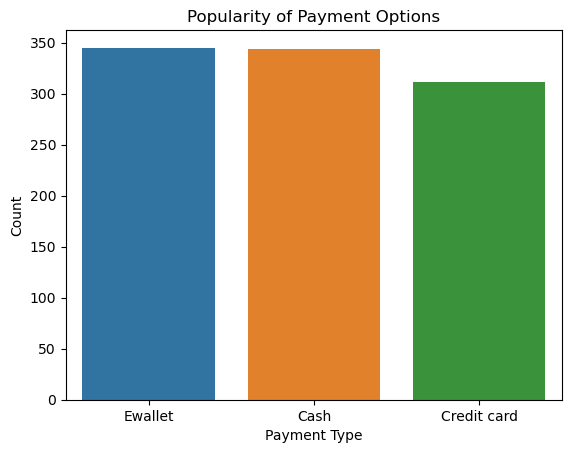

In [154]:
#We will do the same or payment method across all branches
sorted_counts = ds_sales['Payment'].value_counts().sort_values(ascending=False)
sorted_categories = sorted_counts.index.tolist()

sns.countplot(x='Payment', data=ds_sales, order=sorted_categories)
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.title('Popularity of Payment Options')

ewallet, cash, credit = ds_sales['Payment'].value_counts()
print('Number of Ewallet transactions: ', ewallet)
print('Number of Cash transactions: ', cash)
print('Number of Credit Card transactions: ', credit)
# ds_sales['Payment'].value_counts() <-- for comparison

From here, we can tell that Ewallet is the most frequently used form of payment, followed by Cash and Credit Card

Number of Male:  499
Number of Female:  501


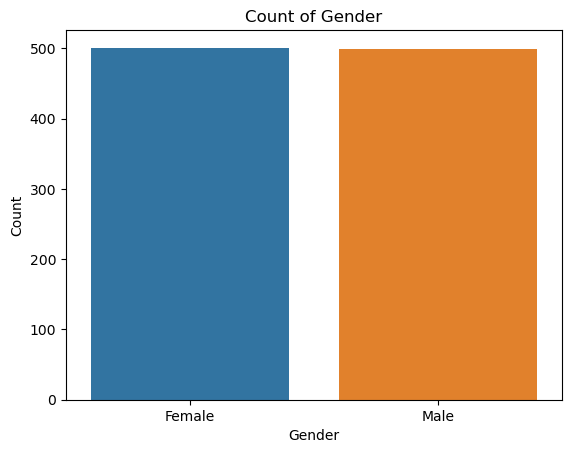

In [155]:
#Showing the statistics as to how many men and female are in this dataset

sns.countplot(ds_sales['Gender'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Gender')
F, M = ds_sales.Gender.value_counts()

print('Number of Male: ', M)
print('Number of Female: ', F)
# ds_sales.Gender.value_counts() <-- for comparison

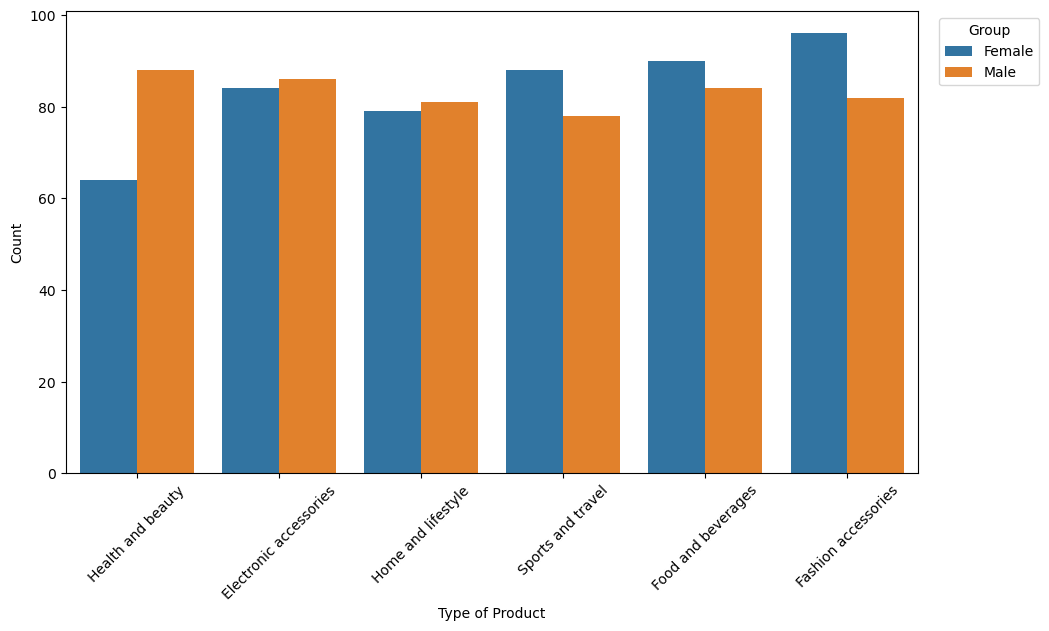

In [156]:
#Let's plot an sns countplot to see the comparison of what gender buys the most out of a particular product category
plt.figure(figsize=(11, 6))
sns.countplot(x ='Product line', hue = "Gender", data = ds_sales) 
plt.legend(title='Group', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=45)
plt.xlabel('Type of Product')
plt.ylabel('Count')
plt.show()

From here we can tell that Males contribute more to health and beauty, electronic accessories as well as home and lifestyle products.
Females contribute more towards sports and travel, food and beverages and fashion products.

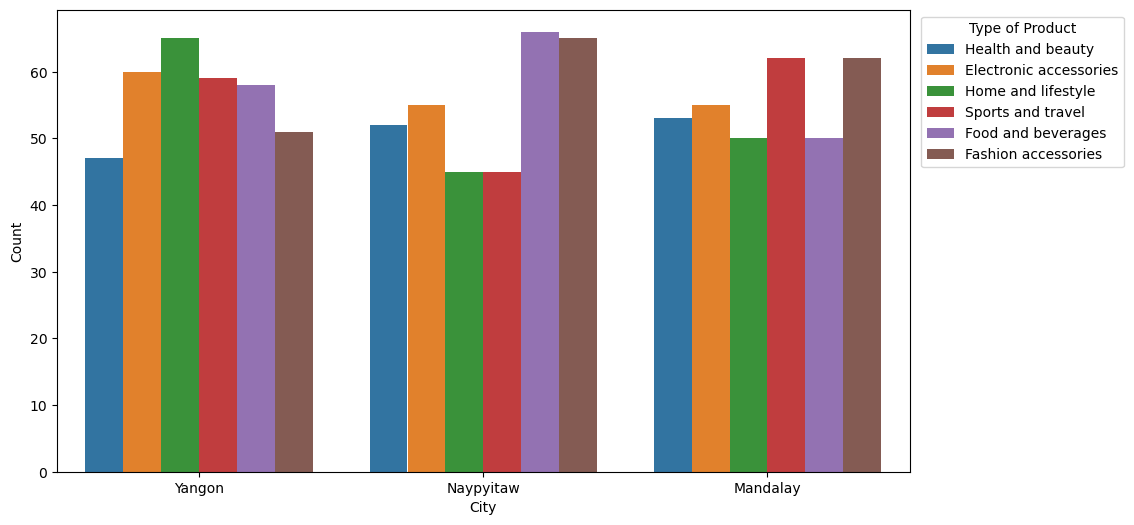

In [157]:
#Let's do the same for each branch/city instead of gender
plt.figure(figsize=(11, 6))
sns.countplot(x ='City', hue = "Product line", data = ds_sales) 
plt.legend(title='Type of Product', loc='upper right', bbox_to_anchor=(1.26, 1))
# plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

Yagon(Branch A) sells the most of Home and Lifestyle products  
Mandalay(Branch B) sells the most of Sports and Travel, tied with Fashion Accessories  
Naypyitaw(Branch C) sells the most of Food and Beverage products

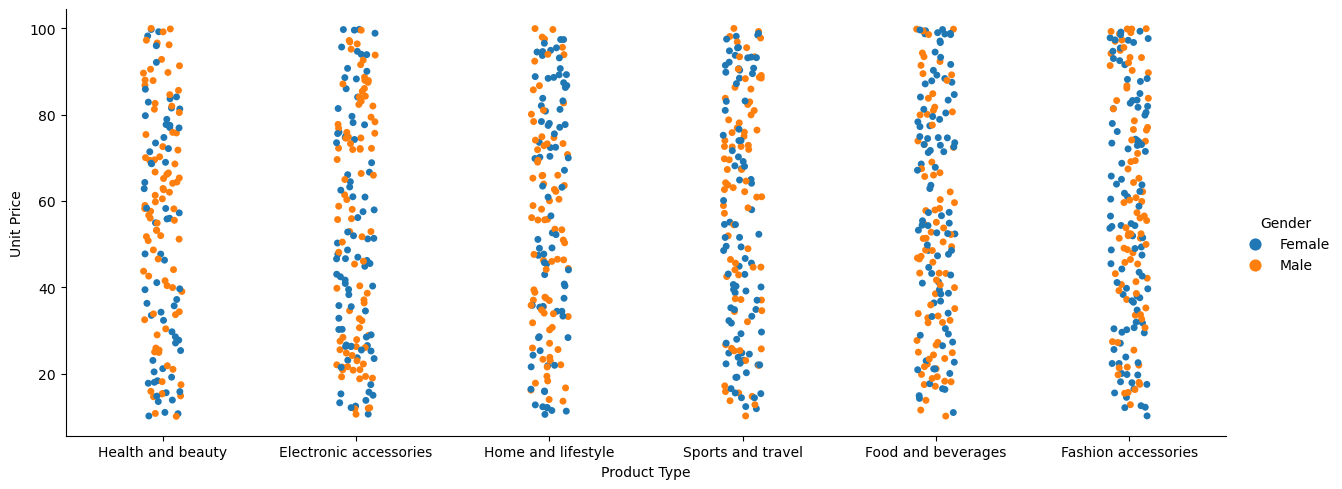

In [158]:
#Using sns catplot to show distribution of the 2 genders when it comes to product type, and the price of product
sns.catplot(x='Product line',y='Unit price',hue='Gender',data=ds_sales, aspect=2.5)
plt.xlabel('Product Type')
plt.ylabel('Unit Price')
plt.show()

This shows that within each product line, the distribution of how much the 2 genders are spending in each product category

In [178]:
#Let's check for the moving average of sales across the time frame of the dataset on a weekly basis
#Since Date and Time are object datatypes, we need to change that
ds_sales['Date'] = pd.to_datetime(ds_sales['Date'])
ds_sales['Time'] = pd.to_datetime(ds_sales['Time'])
ds_sales.dtypes
ds_sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2023-07-29 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2023-07-29 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2023-07-29 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2023-07-29 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2023-07-29 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


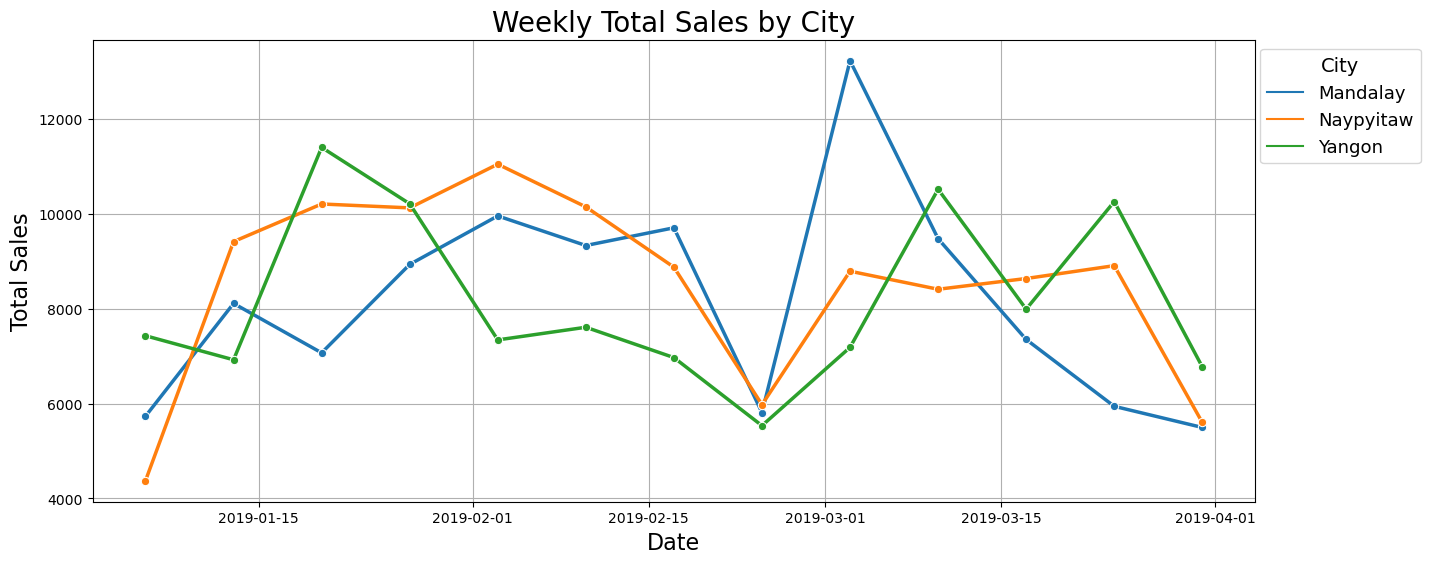

In [182]:
# Group up the total number of sales on a weekly basis
weekly_sales = ds_sales.groupby(['City', pd.Grouper(key='Date', freq='W')])['Total'].sum().reset_index()

# Calculates the mean number of sales per city
mean_weekly_sales = weekly_sales.groupby('City')['Total'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='Total', hue='City', data=weekly_sales, marker='o', linewidth=2.5)
plt.title('Weekly Total Sales by City', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Total Sales', fontsize=16)
plt.grid(True)
plt.legend(title='City', title_fontsize='14', loc='upper right', fontsize='13', bbox_to_anchor=(1.15, 1))
plt.show()

A helpful way to visualise trends in the performance of each branch over a period of time

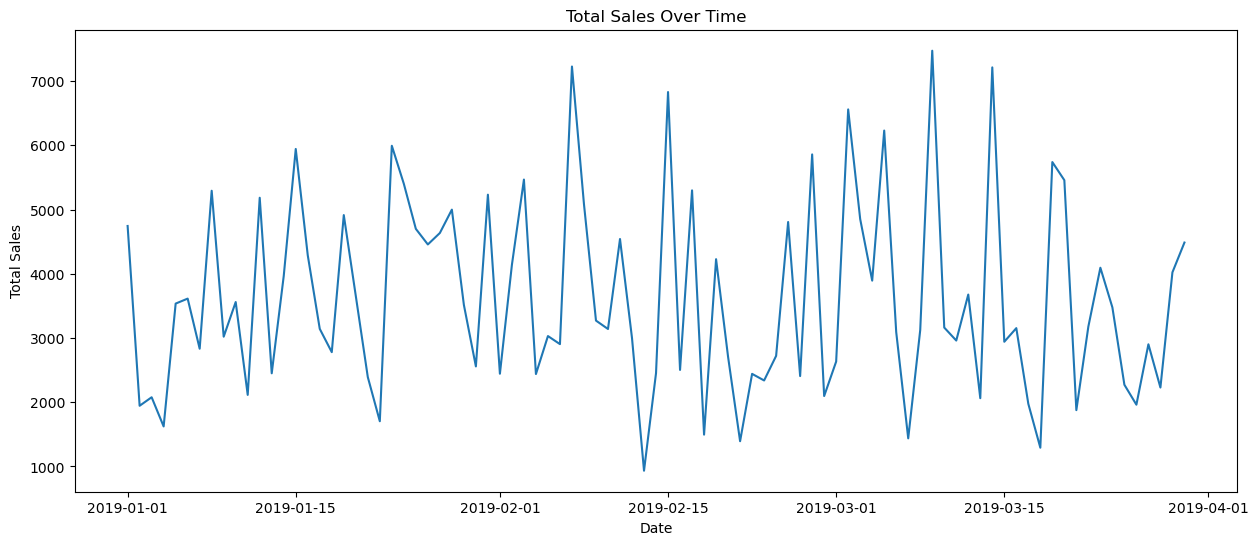

In [176]:
#Let's plot the total number of sales over the time frame of this dataset
grouped_sales = ds_sales.groupby('Date')['Total'].sum()

# Plot the total sales over time
plt.figure(figsize=(15, 6))
sns.lineplot(x=grouped_sales.index, y=grouped_sales.values)
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


Yagon has the most number of overall sales

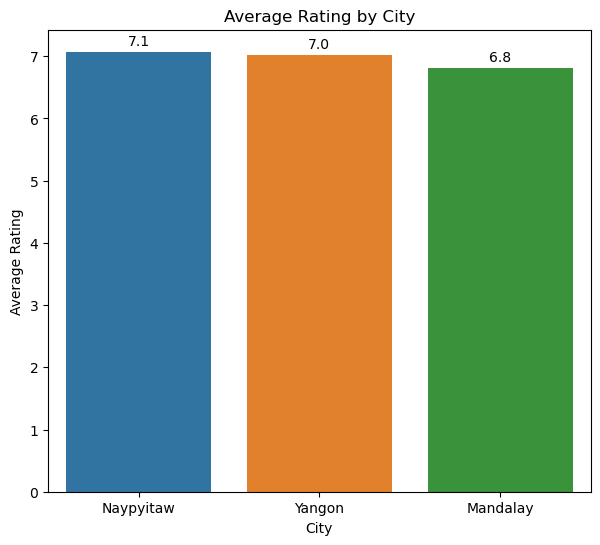

In [ ]:
#Let's check or the ratings given by customers for each city
plt.figure(figsize=(7, 6))
average_ratings = ds_sales.groupby('City')['Rating'].mean().reset_index()
average_ratings = average_ratings.sort_values(by='Rating', ascending=False)
#Basically made the barplot appear in descending order
ax = sns.barplot(x='City', y='Rating', data=average_ratings, ci=None)
for rating in ax.patches:
    height = rating.get_height()
    ax.text(rating.get_x() + rating.get_width() / 2, height + 0.1, f'{height:.1f}', ha='center')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.title('Average Rating by City')
plt.show()

Branch C here receives the highest average rating across the purchases met with an average rating of 7.1  
Branch A next in line with 7.0  
Branch B with the lowest rating of 6.8

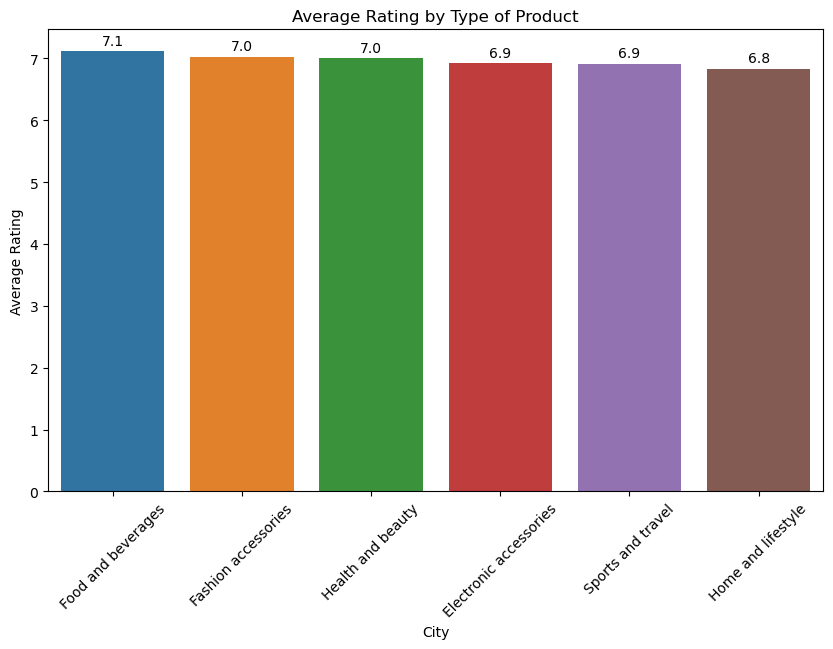

In [ ]:
#Let's do one more with the product line
plt.figure(figsize=(10, 6))
average_ratings = ds_sales.groupby('Product line')['Rating'].mean().reset_index()
average_ratings = average_ratings.sort_values(by='Rating', ascending=False)
#Same here, for visualisation purposes
ax = sns.barplot(x='Product line', y='Rating', data=average_ratings, ci=None)
for rating in ax.patches:
    height = rating.get_height()
    ax.text(rating.get_x() + rating.get_width() / 2, height + 0.1, f'{height:.1f}', ha='center')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.title('Average Rating by Type of Product')
plt.show()

FnB receiving the highest average ratings across all stores with 7.1  
Fashion Accessories together with Health and Beauty at 7.0  
Electronic Accessories together with Sports and Travel at 6.9  
Home and Lifestyle with the lowest average rating of 6.8

# Thank you for reaching here, if you have any comments as to how I can improve, feel free to let me know!